In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot, aes, geom_point, geom_abline, geom_hline, labs, theme_light

In [4]:
myData = pd.read_csv("/Users/evaneldridge/Desktop/544/Lab 6/Hitters.csv")
myData.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [7]:
no_salary = myData[myData['Salary'].isna()]
no_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 316
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      59 non-null     int64  
 1   Hits       59 non-null     int64  
 2   HmRun      59 non-null     int64  
 3   Runs       59 non-null     int64  
 4   RBI        59 non-null     int64  
 5   Walks      59 non-null     int64  
 6   Years      59 non-null     int64  
 7   CAtBat     59 non-null     int64  
 8   CHits      59 non-null     int64  
 9   CHmRun     59 non-null     int64  
 10  CRuns      59 non-null     int64  
 11  CRBI       59 non-null     int64  
 12  CWalks     59 non-null     int64  
 13  League     59 non-null     object 
 14  Division   59 non-null     object 
 15  PutOuts    59 non-null     int64  
 16  Assists    59 non-null     int64  
 17  Errors     59 non-null     int64  
 18  Salary     0 non-null      float64
 19  NewLeague  59 non-null     object 
dtypes: float64(1), i

In [8]:
yes_salary = myData[myData['Salary'].notna()]
yes_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [9]:
myData = myData.dropna()
myData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

Part I: Different Model Specs - A. Regression without regularization
1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary linear regression

2. Fit this pipeline to the full dataset, and interpret a few of the most important coefficients.

3. Use cross-validation to estimate the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [10]:
x = myData.drop(["Salary"], axis=1)
y = myData["Salary"]

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

lr_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("linear_regression", LinearRegression())
    ]
)

lr_fitted = lr_pipeline.fit(x, y)

lr_coefs = lr_fitted.named_steps['linear_regression'].coef_
feature_names = lr_fitted.named_steps['preprocessing'].get_feature_names_out()

lr_coeff_series = pd.Series(lr_coefs, index=feature_names)
lr_coeff_series_sorted = lr_coeff_series.abs().sort_values(ascending=False)

print(lr_coeff_series_sorted)


standardize__CRuns      480.747135
standardize__CAtBat     391.038655
standardize__Hits       337.830479
standardize__AtBat      291.094556
standardize__CRBI       260.689886
standardize__CWalks     213.892259
standardize__Walks      135.073897
dummify__Division_W     116.849246
standardize__CHits       86.687617
standardize__PutOuts     78.761296
dummify__League_N        62.599423
standardize__Runs        60.572479
standardize__Assists     53.732490
standardize__HmRun       37.853837
standardize__RBI         26.994984
dummify__NewLeague_N     24.762325
standardize__Errors      22.160862
standardize__Years       16.693359
standardize__CHmRun      14.181723
dtype: float64


Career performance metrics, especially career runs and at-bats, are the strongest salary predictors, followed by recent-season stats like hits. Division and league affiliation also influence salary, indicating differences across groups. Consistent, high performance and experience are key to higher earnings.

In [51]:
#ChatGPT - Return the scores (negative) and use abs() function to take absolute value
scores = abs(cross_val_score(lr_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
model1_mse = abs(scores.mean())
print(model1_mse)

144100.59066827153


B. Ridge regression
1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

2. Use cross-validation to tune the lambda hyperparameter.

3. Fit the pipeline with your chosen to the full dataset, and interpret a few of the most important coefficients.

4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [53]:
x = myData.drop(["Salary"], axis = 1)
y = myData["Salary"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop= "first"), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge", Ridge())]
)

#Alphas
alphas = {'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

#Grid Search
grid_search = GridSearchCV(ridge_pipeline, alphas, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(x, y)

bestAlpha = grid_search.best_params_['ridge__alpha']
bestAlpha

1

In [14]:
ridge_pipeline.set_params(ridge__alpha=bestAlpha)
ridge_pipeline.fit(x, y)

ridge_coefs = ridge_pipeline.named_steps['ridge'].coef_

feature_names = ridge_pipeline.named_steps['preprocessing'].get_feature_names_out()

ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)

ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
ridge_coeff_series_sorted

standardize__CRuns      320.802717
standardize__Hits       296.801967
standardize__AtBat      271.088165
standardize__CAtBat     225.511649
standardize__CWalks     184.289408
standardize__CRBI       160.409497
standardize__CHits      126.210585
standardize__Walks      124.344012
dummify__Division_W     119.076927
standardize__PutOuts     78.651037
dummify__League_N        58.555947
standardize__Assists     47.493631
standardize__CHmRun      39.055346
standardize__Years       38.619131
standardize__Runs        29.212352
dummify__NewLeague_N     24.027205
standardize__Errors      23.651303
standardize__HmRun       17.973971
standardize__RBI          8.909304
dtype: float64

In [54]:
#ChatGPT - Return the scores (negative) and use abs() function to take absolute value
scores = abs(cross_val_score(ridge_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
model2_mse = abs(scores.mean())
print(model2_mse)

114422.40126651069


From this model, we can see that career runs are the most important indicator of salary, based off these coefficients.

Lasso Regression
1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

2. Use cross-validation to tune the lambda hyperparameter.

3. Fit the pipeline with your chosen lambda to the full dataset, and interpret a few of the most important coefficients.

4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [56]:
x = myData.drop(["Salary"], axis = 1)
y = myData["Salary"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop= "first"), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso", Lasso())]
)

     
#Alphas
alphas = {'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(lasso_pipeline, alphas, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(x, y)

bestAlpha = grid_search.best_params_['lasso__alpha']
bestAlpha

lasso_pipeline.set_params(lasso__alpha=bestAlpha)
lasso_pipeline.fit(x, y)

lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_

feature_names = lasso_pipeline.named_steps['preprocessing'].get_feature_names_out()

lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)

lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
lasso_coeff_series_sorted

/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e+07, tolerance: 5.077e+03
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+07, tolerance: 4.958e+03
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.020e+07, tolerance: 4.119e+03
/Users/evaneldri

standardize__CRuns      375.565519
standardize__Hits       304.359509
standardize__AtBat      282.370957
standardize__CRBI       192.610892
standardize__CWalks     189.644642
standardize__CAtBat     162.639794
standardize__Walks      120.695275
dummify__Division_W     114.412951
standardize__PutOuts     78.760366
standardize__Assists     41.996680
dummify__League_N        35.826072
standardize__Years       34.948148
standardize__Runs        24.966507
standardize__Errors      18.479378
standardize__CHmRun      14.225993
standardize__HmRun       11.127022
dummify__NewLeague_N      0.000000
standardize__RBI          0.000000
standardize__CHits        0.000000
dtype: float64

From this model, we can also see that Career Runs are are the most important variables.

In [55]:
#ChatGPT - Return the scores (negative) and use abs() function to take absolute value
scores = abs(cross_val_score(lasso_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
mse_model_3 = abs(scores.mean())
print(mse_model_3)


114455.23501101194


/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.969e+03, tolerance: 4.638e+03
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+04, tolerance: 4.976e+03


In [27]:
#Elastic Net
x = myData.drop(["Salary"], axis = 1)
y = myData["Salary"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop= "first"), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)
ElasticPipeline = Pipeline(
  [("preprocessing", ct),
   #ChatGPT - ElasticeNet() Function
  ("elastic_net", ElasticNet())]
)

param_grid = {
    'elastic_net__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'elastic_net__l1_ratio': [0.0, 0.25, 0.5, 0.75, 0.95, 1.0]}

gscv = GridSearchCV(ElasticPipeline, param_grid, cv = 5, scoring='neg_mean_squared_error')

gscv_fitted = gscv.fit(x, y)

gscv_fitted.cv_results_

/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+07, tolerance: 4.708e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.180e+06, tolerance: 3.606e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mod

{'mean_fit_time': array([0.03230662, 0.02191696, 0.01398406, 0.01396875, 0.01380715,
        0.01658134, 0.01509805, 0.01415739, 0.01377392, 0.01517482,
        0.01402006, 0.01442633, 0.01609926, 0.01353064, 0.01517048,
        0.01535215, 0.01435056, 0.01448436, 0.01439557, 0.01166091,
        0.01205764, 0.01242275, 0.01308784, 0.01388016, 0.01468496,
        0.01184797, 0.01149788, 0.01099024, 0.01049337, 0.01268854,
        0.01495996, 0.0096777 , 0.01052599, 0.01018095, 0.01043901,
        0.00983448]),
 'std_fit_time': array([0.01175279, 0.00389674, 0.00067148, 0.00070088, 0.00077065,
        0.00180489, 0.0007091 , 0.00078369, 0.00025412, 0.00052778,
        0.00024748, 0.00091412, 0.00152183, 0.00092775, 0.00094985,
        0.00072994, 0.0005503 , 0.00086367, 0.00039825, 0.00020049,
        0.00049635, 0.00047845, 0.00055904, 0.00022782, 0.00017259,
        0.00064188, 0.000502  , 0.00036605, 0.00024406, 0.00089101,
        0.00032262, 0.00028826, 0.00059665, 0.00041845, 0.000

In [28]:
gscv_fitted.cv_results_['mean_test_score']


array([-120815.72529038, -120858.82599446, -120903.38606501,
       -120949.46733732, -120987.47076674, -120997.13421461,
       -119883.30746829, -120056.4506777 , -120281.59492196,
       -120582.17201368, -120900.53976282, -120994.17981481,
       -118775.10956154, -118857.24729517, -119009.71764424,
       -119340.06138206, -120261.08782622, -120964.76468618,
       -119649.76109006, -119415.17092853, -119116.47317065,
       -118776.33613165, -119012.70626817, -120682.25263745,
       -122737.61910137, -122065.01283502, -121363.37695974,
       -120643.0417211 , -119368.55319512, -119761.58740741,
       -150229.98618087, -144263.49195872, -137072.72527313,
       -128843.18232857, -122088.47157837, -121828.14133339])

In [31]:
ElasticPipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet(alpha = 0.1, l1_ratio = 0.5))]
)
elastic_fitted = ElasticPipeline.fit(x, y)

elastic_coefs = elastic_fitted.named_steps['elastic_net'].coef_

feature_names = ElasticPipeline.named_steps['preprocessing'].get_feature_names_out()

elastic_coeff_series = pd.Series(elastic_coefs, index=feature_names)

elastic_coeff_series_sorted = elastic_coeff_series.abs().sort_values(ascending=False)
elastic_coeff_series_sorted

standardize__Hits       133.372258
standardize__AtBat      111.954025
dummify__Division_W     107.386338
standardize__CRuns      104.608431
standardize__CHits       88.655133
standardize__CRBI        86.237772
standardize__CWalks      77.645076
standardize__Walks       75.529804
standardize__PutOuts     74.411158
standardize__CHmRun      56.841293
standardize__Years       44.510213
dummify__League_N        35.836188
standardize__Assists     25.923809
standardize__Runs        25.858430
standardize__Errors      24.026959
standardize__RBI         19.166809
standardize__HmRun       12.365407
standardize__CAtBat       7.926368
dummify__NewLeague_N      3.431073
dtype: float64

In this model, we have a different most important variable. According To Elastic Net, His and At bats are the most impactful coefficient, not career homeruns.

Part II. Variable Selection

In [41]:

#ChatGPT - Create function to return coefficents from regression above, on CSV file
def extract_coefficients(model, model_name):
    pipeline = Pipeline([
        ("preprocessing", ct),
        (model_name, model)
    ])
    pipeline.fit(x, y)
    feature_names = pipeline.named_steps['preprocessing'].get_feature_names_out()
    coefs = pipeline.named_steps[model_name].coef_
    return pd.Series(coefs, index=feature_names)

lr_coeff_series = extract_coefficients(LinearRegression(), "linear_regression")
ridge_coefs = extract_coefficients(Ridge(alpha=1.0), "ridge")
lasso_coefs = extract_coefficients(Lasso(alpha=0.1), "lasso")
elastic_coefs = extract_coefficients(ElasticNet(alpha=0.1, l1_ratio=0.5), "elastic_net")

variable_df = pd.DataFrame(lr_coeff_series).reset_index()
variable_df = variable_df.rename({"index": "labels", 0: "linearValues"}, axis=1)

variable_df['ridgeValues'] = ridge_coefs.values
variable_df['lassoValues'] = lasso_coefs.values
variable_df['elasticValues'] = elastic_coefs.values

# Calculate average absolute values and sort
variable_df['average_values'] = variable_df[['linearValues', 'ridgeValues', 'lassoValues', 'elasticValues']].abs().mean(axis=1)
variable_df = variable_df.sort_values(by="average_values", ascending=False).reset_index(drop=True)

variable_df


/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.040e+05, tolerance: 5.332e+03


,labels,linearValues,ridgeValues,lassoValues,elasticValues,average_values
0,standardize__CRuns,480.747135,320.802717,457.636761,104.608431,340.948761
1,standardize__Hits,337.830479,296.801967,330.442277,133.372258,274.611745
2,standardize__CAtBat,-391.038655,-225.511649,-387.868353,-7.926368,253.086256
3,standardize__AtBat,-291.094556,-271.088165,-288.386478,-111.954025,240.630806
4,standardize__CRBI,260.689886,160.409497,237.494492,86.237772,186.207911
5,standardize__CWalks,-213.892259,-184.289408,-208.094347,-77.645076,170.980272
6,standardize__Walks,135.073897,124.344012,132.660944,75.529804,116.902164
7,dummify__Division_W,-116.849246,-119.076927,-116.401102,-107.386338,114.928403
8,standardize__CHits,86.687617,126.210585,112.562547,88.655133,103.528971
9,standardize__PutOuts,78.761296,78.651037,78.781802,74.411158,77.651324


In [81]:
# Linear regression with only career runs (CRuns)
x = myData[["CRuns"]]
y = myData["Salary"]

ct = ColumnTransformer(
    [("standardize", StandardScaler(), ['CRuns'])],
    remainder="drop"
)

lr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("linear_regression", LinearRegression())]
)
lr_fitted = lr_pipeline.fit(x, y)

lr_coefs = lr_fitted.named_steps['linear_regression'].coef_
lr_coeff_series = pd.Series(lr_coefs, index=["CRuns"])

lr_coeff_series_sorted = lr_coeff_series.abs().sort_values(ascending=False)
print(lr_coeff_series_sorted)

scores = abs(cross_val_score(lr_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
model5_mse = abs(scores.mean())
print(model5_mse)
     

CRuns    253.351392
dtype: float64
144100.59066827153


In [83]:
#Linear Regression with career runs, hits, at bats, career at bater and career walks
x = myData.drop("Salary", axis = 1)
y = myData["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

lr_fitted = lr_pipeline.fit(x, y)
lr_coefs = lr_fitted.named_steps['linear_regression'].coef_

featureNames = ['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks']
lr_coeff_series = pd.Series(lr_coefs, index=featureNames)

lr_coeff_series_sorted = lr_coeff_series.abs().sort_values(ascending=False)
print(lr_coeff_series_sorted)

scores = abs(cross_val_score(lr_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
model6_mse = abs(scores.mean())
print(model6_mse)

CRuns     456.319655
Hits      327.135303
CAtBat    234.721048
AtBat     196.706159
CWalks      4.068062
dtype: float64
126499.88010330065


In [87]:
#Linear Regression with Interaction 
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import pandas as pd

x = myData.drop("Salary", axis=1)
y = myData["Salary"]

ct1 = ColumnTransformer(
    [
        ("encode_division", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), ['Division']),
        ("scale_features", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks'])
    ],
    remainder="drop"
)

#ChatGPT - create interactions
ct2 = ColumnTransformer(
    [
        ("interaction_cruns_div", PolynomialFeatures(interaction_only=True), ["scale_features__CRuns", "encode_division__Division_W"]),
        ("interaction_hits_div", PolynomialFeatures(interaction_only=True), ["scale_features__Hits", "encode_division__Division_W"]),
        ("interaction_atbat_div", PolynomialFeatures(interaction_only=True), ["scale_features__AtBat", "encode_division__Division_W"]),
        ("interaction_catbat_div", PolynomialFeatures(interaction_only=True), ["scale_features__CAtBat", "encode_division__Division_W"]),
        ("interaction_cwalks_div", PolynomialFeatures(interaction_only=True), ["scale_features__CWalks", "encode_division__Division_W"])
    ],
    remainder="drop"
).set_output(transform="pandas")

model_pipeline = Pipeline(
    [
        ("initial_processing", ct1),
        ("interaction_processing", ct2),
        ("linear_model", LinearRegression())
    ]
).set_output(transform="pandas")

fitted_model = model_pipeline.fit(x, y)

model_coefficients = fitted_model.named_steps['linear_model'].coef_
feature_names = fitted_model.named_steps['interaction_processing'].get_feature_names_out()

coeff_series = pd.Series(model_coefficients, index=feature_names)
sorted_coeff_series = coeff_series.abs().sort_values(ascending=False)
print(sorted_coeff_series)

scores = abs(cross_val_score(lr_pipeline, x, y, cv=5, scoring='neg_mean_squared_error'))
model7_mse = abs(scores.mean())
print(model7_mse)

interaction_cruns_div__scale_features__CRuns                                  5.771877e+02
interaction_hits_div__scale_features__Hits                                    4.474046e+02
interaction_cruns_div__scale_features__CRuns encode_division__Division_W      3.801191e+02
interaction_catbat_div__scale_features__CAtBat encode_division__Division_W    3.691950e+02
interaction_hits_div__scale_features__Hits encode_division__Division_W        3.580921e+02
interaction_atbat_div__scale_features__AtBat encode_division__Division_W      3.406356e+02
interaction_catbat_div__scale_features__CAtBat                                3.247907e+02
interaction_atbat_div__scale_features__AtBat                                  3.245391e+02
interaction_cwalks_div__scale_features__CWalks encode_division__Division_W    8.518723e+01
interaction_hits_div__encode_division__Division_W                             2.359054e+01
interaction_cwalks_div__encode_division__Division_W                           2.359054e+01

In [93]:
#Ridge Regression with only career runs
x = myData[["CRuns"]]
y = myData["Salary"]

ct = ColumnTransformer(
    [("standardize", StandardScaler(), ['CRuns'])],
    remainder="drop"
)

ridge_pipeline = Pipeline(
    [("preprocessing", ct),
     ("ridge_regression", Ridge(alpha=1.0))] 
)

ridge_fitted = ridge_pipeline.fit(x, y)

ridge_coefs = ridge_fitted.named_steps['ridge_regression'].coef_
ridge_coeff_series = pd.Series(ridge_coefs, index=["CRuns"])
ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
print(ridge_coeff_series_sorted)

scores = abs(cross_val_score(ridge_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
ridge_mse = abs(scores.mean())
print("Ridge CRun MSE:", ridge_mse)


CRuns    252.391728
dtype: float64
Ridge CRun MSE: 144068.46489253305


In [104]:
#Ridge Regression with 5 best variables
x = myData.drop("Salary", axis=1)
y = myData["Salary"]

ct = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks'])
    ],
    remainder="drop"
)

ridge_pipeline = Pipeline(
    [("preprocessing", ct),
     ("ridge_regression", Ridge(alpha=1.0))] 
).set_output(transform="pandas")

ridge_fitted = ridge_pipeline.fit(x, y)

ridge_coefs = ridge_fitted.named_steps['ridge_regression'].coef_
feature_names = ['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks']
ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)
ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
print(ridge_coeff_series_sorted)

scores = abs(cross_val_score(ridge_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
ridge_mse = abs(scores.mean())
print("Ridge 5 Best MSE:", ridge_mse)


CRuns     380.505983
Hits      307.149947
AtBat     173.562058
CAtBat    171.164182
CWalks      7.992500
dtype: float64
Ridge 5 Best MSE: 126041.22754897983


In [98]:
#Ridge with 5 best and interaction
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

# Define predictors and target
x = myData.drop("Salary", axis=1)
y = myData["Salary"]

best_numeric_features = ['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks']
top_categorical_feature = 'Division'  

preprocess_pipeline = ColumnTransformer(
    [
        ("encode_categorical", OneHotEncoder(sparse_output=False, drop="first"), [top_categorical_feature]),
        ("scale_numeric", StandardScaler(), best_numeric_features)
    ],
    remainder="drop"
)

#ChatGPT - Step 2: Create interaction terms between standardized numeric features and the encoded categorical feature
interaction_pipeline = ColumnTransformer(
    [
        ("interactions", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), list(range(len(best_numeric_features) + 1)))  # Adjusted based on feature count
    ]
)

ridge_pipeline = Pipeline(
    [
        ("preprocessing", preprocess_pipeline),
        ("interactions", interaction_pipeline),
        ("ridge_regression", Ridge(alpha=1.0))
    ]
).set_output(transform="pandas")

ridge_fitted = ridge_pipeline.fit(x, y)

ridge_coefs = ridge_fitted.named_steps['ridge_regression'].coef_
feature_names = ridge_pipeline.named_steps['interactions'].get_feature_names_out()
ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)
ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
print(ridge_coeff_series_sorted)

scores = abs(cross_val_score(ridge_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
ridge_mse = abs(scores.mean())
print("Ridge Model MSE with Interactions:", ridge_mse)


interactions__encode_categorical__Division_W scale_numeric__Hits      266.955398
interactions__scale_numeric__CAtBat scale_numeric__CWalks             260.371136
interactions__scale_numeric__CWalks                                   252.803236
interactions__encode_categorical__Division_W scale_numeric__AtBat     231.480425
interactions__scale_numeric__Hits                                     227.841384
interactions__scale_numeric__CRuns scale_numeric__AtBat               198.788250
interactions__scale_numeric__CRuns                                    183.331245
interactions__scale_numeric__AtBat scale_numeric__CAtBat              147.726904
interactions__scale_numeric__Hits scale_numeric__CWalks               130.803110
interactions__encode_categorical__Division_W scale_numeric__CRuns     110.053974
interactions__scale_numeric__AtBat                                    108.091113
interactions__scale_numeric__Hits scale_numeric__CAtBat               101.360441
interactions__scale_numeric_

In [103]:
#Lasso with just career runs
x = myData[["CRuns"]]
y = myData["Salary"]

ct = ColumnTransformer(
    [("standardize", StandardScaler(), ['CRuns'])],
    remainder="drop"
)


lasso_pipeline = Pipeline(
    [("preprocessing", ct),
     ("lasso_regression", Lasso(alpha=0.1))]  
)

lasso_fitted = lasso_pipeline.fit(x, y)

lasso_coefs = lasso_fitted.named_steps['lasso_regression'].coef_
lasso_coeff_series = pd.Series(lasso_coefs, index=["CRuns"])
lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
print(lasso_coeff_series_sorted)

scores = abs(cross_val_score(lasso_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
lasso_mse = abs(scores.mean())
print("Lasso CRun MSE:", lasso_mse)


CRuns    253.251392
dtype: float64
Lasso CRun MSE: 144098.54979087558


In [105]:
#Lasso 5 best variables
x = myData[['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks']]  # Assuming these are the best five variables
y = myData["Salary"]

preprocess = ColumnTransformer(
    [("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks'])],
    remainder="drop"
)

lasso_pipeline = Pipeline(
    [("preprocessing", preprocess),
     ("lasso_regression", Lasso(alpha=0.1))]  # Adjust alpha as needed for regularization strength
)

lasso_fitted = lasso_pipeline.fit(x, y)

lasso_coefs = lasso_fitted.named_steps['lasso_regression'].coef_
feature_names = ['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks']
lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)
lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
print(lasso_coeff_series_sorted)

scores = abs(cross_val_score(lasso_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
lasso_mse = abs(scores.mean())
print("Lasso Model MSE:", lasso_mse)


CRuns     448.438388
Hits      325.001689
CAtBat    228.481205
AtBat     194.196111
CWalks      2.385087
dtype: float64
Lasso Model MSE: 126449.52806489519


In [106]:
#Lasso Regression with Best 5 Numeric Variables and  Interaction With Top Categorical Variable
x = myData.drop("Salary", axis=1)
y = myData["Salary"]

best_numeric_features = ['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks']  # Example of best numeric features
top_categorical_feature = 'Division'  # Example of a top categorical variable

preprocess_pipeline = ColumnTransformer(
    [
        ("encode_categorical", OneHotEncoder(sparse_output=False, drop="first"), [top_categorical_feature]),
        ("scale_numeric", StandardScaler(), best_numeric_features)
    ],
    remainder="drop"
)

interaction_pipeline = Pipeline([
    ("interactions", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))
])

lasso_pipeline = Pipeline(
    [
        ("preprocessing", preprocess_pipeline),
        ("interaction_processing", interaction_pipeline),
        ("lasso_regression", Lasso(alpha=0.1))  
    ]
)
lasso_fitted = lasso_pipeline.fit(x, y)

feature_names = lasso_pipeline.named_steps['preprocessing'].get_feature_names_out()
interaction_feature_names = lasso_pipeline.named_steps['interaction_processing'].get_feature_names_out(feature_names)
lasso_coefs = lasso_fitted.named_steps['lasso_regression'].coef_

lasso_coeff_series = pd.Series(lasso_coefs, index=interaction_feature_names)
lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
print(lasso_coeff_series_sorted)

scores = abs(cross_val_score(lasso_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
lasso_mse = abs(scores.mean())
print("Lasso Model MSE with Interactions:", lasso_mse)


/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.459e+06, tolerance: 5.332e+03
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.324e+06, tolerance: 5.077e+03
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.671e+06, tolerance: 4.958e+03
/Users/evaneldri

scale_numeric__CRuns scale_numeric__AtBat               596.515241
scale_numeric__AtBat scale_numeric__CAtBat              573.935933
scale_numeric__Hits scale_numeric__CAtBat               519.433872
scale_numeric__CRuns scale_numeric__Hits                466.652162
encode_categorical__Division_W scale_numeric__Hits      378.965159
encode_categorical__Division_W scale_numeric__AtBat     339.944501
scale_numeric__CWalks                                   280.849039
scale_numeric__CAtBat scale_numeric__CWalks             280.164151
scale_numeric__Hits                                     277.944746
encode_categorical__Division_W scale_numeric__CRuns     216.572757
scale_numeric__CRuns                                    174.158022
scale_numeric__AtBat                                    163.300001
scale_numeric__Hits scale_numeric__CWalks               153.852505
encode_categorical__Division_W scale_numeric__CAtBat    127.069197
scale_numeric__CRuns scale_numeric__CWalks              104.21

/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.924e+06, tolerance: 4.972e+03
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.483e+06, tolerance: 4.913e+03


In [109]:
#Elastic Regression with just career runs
x = myData[["CRuns"]]
y = myData["Salary"]

preprocessor = ColumnTransformer(
    [("standardize", StandardScaler(), ['CRuns'])],
    remainder="drop"
)

elastic_net_pipeline = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("elastic_net_regression", ElasticNet(alpha=0.1, l1_ratio=0.5))
    ]
)

elastic_net_fitted = elastic_net_pipeline.fit(x, y)

elastic_net_coefs = elastic_net_fitted.named_steps['elastic_net_regression'].coef_
elastic_net_coeff_series = pd.Series(elastic_net_coefs, index=["CRuns"])
elastic_net_coeff_series_sorted = elastic_net_coeff_series.abs().sort_values(ascending=False)
print(elastic_net_coeff_series_sorted)

scores = abs(cross_val_score(elastic_net_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
elastic_net_mse = abs(scores.mean())
print(elastic_net_mse)


CRuns    241.239421
dtype: float64
143877.3762316949


In [112]:
#Elastic Regression with 5 best variables
x = myData[['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks']]
y = myData["Salary"]

preprocessor = ColumnTransformer(
    [("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks'])],
    remainder="drop"
)

elastic_net_pipeline = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("elastic_net_regression", ElasticNet(alpha=0.1, l1_ratio=0.5))
    ]
)

elastic_net_fitted = elastic_net_pipeline.fit(x, y)

elastic_net_coefs = elastic_net_fitted.named_steps['elastic_net_regression'].coef_
feature_names = ['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks']
elastic_net_coeff_series = pd.Series(elastic_net_coefs, index=feature_names)
elastic_net_coeff_series_sorted = elastic_net_coeff_series.abs().sort_values(ascending=False)
print(elastic_net_coeff_series_sorted)

scores = abs(cross_val_score(elastic_net_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
elastic_net_mse = abs(scores.mean())
print(elastic_net_mse)


Hits      185.217415
CRuns     168.500077
AtBat      44.953374
CWalks     40.635467
CAtBat      5.183808
dtype: float64
127716.72388362237


In [115]:
#Elastic Regression with 5 best and interaction
from sklearn.model_selection import GridSearchCV

x = myData.drop("Salary", axis=1)
y = myData["Salary"]

best_numeric_features = ['CRuns', 'Hits', 'AtBat', 'CAtBat', 'CWalks']
top_categorical_feature = 'Division'

preprocessor = ColumnTransformer(
    [
        ("encode_categorical", OneHotEncoder(sparse_output=False, drop="first"), [top_categorical_feature]),
        ("scale_numeric", StandardScaler(), best_numeric_features)
    ],
    remainder="drop"
)

interaction_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("interactions", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))
])

elastic_net_pipeline = Pipeline(
    [
        ("interaction_processing", interaction_pipeline),
        ("elastic_net_regression", ElasticNet())
    ]
)

param_grid = {
    "elastic_net_regression__alpha": [0.01, 0.1, 1, 10],
    "elastic_net_regression__l1_ratio": [0.1, 0.5, 0.9]
}

grid_search = GridSearchCV(elastic_net_pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(x, y)

best_alpha = grid_search.best_params_['elastic_net_regression__alpha']
best_l1_ratio = grid_search.best_params_['elastic_net_regression__l1_ratio']
best_mse = abs(grid_search.best_score_)

best_alpha, best_l1_ratio, best_mse


/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.665e+03, tolerance: 5.077e+03
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.360e+04, tolerance: 4.958e+03
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.243e+03, tolerance: 4.119e+03
/Users/evaneldri

(1, 0.1, np.float64(113529.67754226772))

After comparing the MSE from all the models created, we can see the Elastic Net Regression with just the vaiable career runs (CRuns) is the strongest model (MSE = 143877.3762316949)

Part III. 
The coefficients from my Ridge regression models were smaller than those from my standard linear regression models. This outcome is expected because Ridge regression includes a regularization term that penalizes large coefficients by adding the squared sum of all coefficients to the loss function. The MSEs for the Elastic Net models were always the same as or better than those of the Ridge and Lasso models with the same predictors. This makes sense because Elastic Net combines both Ridge and Lasso penalties, allowing it to adjust and find an optimal balance between the two. By using the strengths of both, it’s expected that Elastic Net would at least match or outperform the individual Ridge or Lasso models.



In [117]:
#Part IV: Final Model
#Elastic Regression with just career runs
x = myData[["CRuns"]]
y = myData["Salary"]

preprocessor = ColumnTransformer(
    [("standardize", StandardScaler(), ['CRuns'])],
    remainder="drop"
)

elastic_net_pipeline = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("elastic_net_regression", ElasticNet(alpha=0.1, l1_ratio=0.5))
    ]
)

elastic_net_fitted = elastic_net_pipeline.fit(x, y)

elastic_net_coefs = elastic_net_fitted.named_steps['elastic_net_regression'].coef_
elastic_net_coeff_series = pd.Series(elastic_net_coefs, index=["CRuns"])
elastic_net_coeff_series_sorted = elastic_net_coeff_series.abs().sort_values(ascending=False)
print(elastic_net_coeff_series_sorted)

scores = abs(cross_val_score(elastic_net_pipeline, x, y, cv=10, scoring='neg_mean_squared_error'))
elastic_net_mse = abs(scores.mean())
print(elastic_net_mse)


CRuns    241.239421
dtype: float64
143877.3762316949


In [120]:

y_preds = elastic_net_fitted.predict(X)

myData['y_preds'] = y_preds
myData['residuals'] = myData['Salary'] - myData['y_preds']

myData.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,y_preds,residuals
1,315,81,7,24,38,39,14,3449,835,69,...,375,N,W,632,43,10,475.0,N,506.574074,-31.574074
2,479,130,18,66,72,76,3,1624,457,63,...,263,A,W,880,82,14,480.0,A,435.786213,44.213787
3,496,141,20,65,78,37,11,5628,1575,225,...,354,N,E,200,11,3,500.0,N,876.568355,-376.568355
4,321,87,10,39,42,30,2,396,101,12,...,33,N,E,805,40,4,91.5,N,307.346384,-215.846384
5,594,169,4,74,51,35,11,4408,1133,19,...,194,A,W,282,421,25,750.0,A,637.932990,112.067010


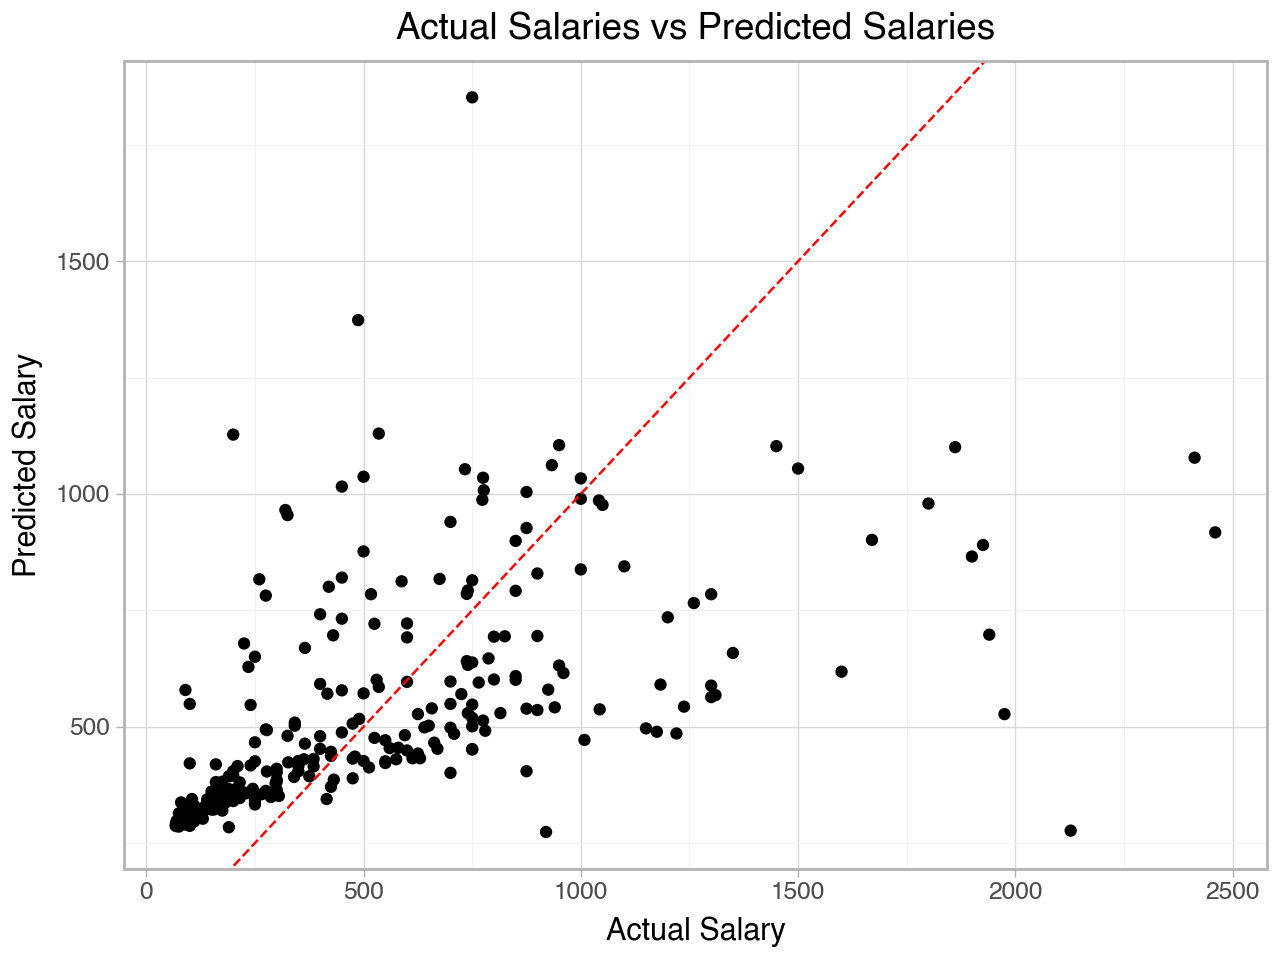

In [122]:
(ggplot(myData, aes(x = "Salary",y = "y_preds")) +
    geom_point() +
    geom_abline(intercept=0, slope=1, color='red', linetype='dashed') +
    labs(title='Actual Salaries vs Predicted Salaries', x='Actual Salary', y='Predicted Salary') + 
    theme_light()
 )

From the graph, we can see that the Elastic Net model using CRuns as the predictor variable for Salary demonstrates a generally positive relationship between predicted and actual salaries. The data points tend to cluster along the red line, although there is some scatter, especially at higher salary values. This scatter indicates that while CRuns is a useful predictor, it alone may not capture all the factors influencing salary, leading to less accuracy for higher salaries.